<a href="https://colab.research.google.com/github/gabrielcerono/DiabetesColaboration/blob/main/Diabetes_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_excel('/content/pone.0216416.s003.xlsx')

# Pre-Processing

In [3]:
data.head()

,no,"gender (male=1, female=0)",age,duration of diabetes,BMI,"insulin regimen (MDI=1, CSII=0)",TDD,TDD/kg,basal,basal/kg,bolus,bolus/kg,HbA1c,eGFR,%body fat,adiponectin,free-testosterone,SMI,grip strength,knee extension strength,gait speed,ucOC,OC
0,1,0,31,17,22.437670,0,43.700001,0.756055,6.336500,0.109628,37.363501,0.646427,6.3,82.927682,0.235501,14.3,0.8,6.9,30.299999,18.200001,0.81,19.10,49.6
1,2,1,31,25,25.556936,1,64.000000,0.820513,16.000000,0.205128,48.000000,0.615385,7.8,92.427345,0.323871,10.0,9.8,7.5,39.700001,25.200001,1.54,3.96,17.4
2,3,0,32,26,20.976562,0,27.400000,0.510242,10.549000,0.196443,16.851000,0.313799,5.8,84.945605,0.239700,16.1,1.1,6.1,18.400000,18.200001,1.20,2.01,10.8
3,4,0,25,17,21.297760,1,60.000000,1.169591,14.100000,0.274854,45.900000,0.894737,7.2,92.742008,0.200393,6.6,1.3,6.5,31.200001,17.799999,1.38,3.53,14.5
4,5,1,39,35,32.608940,0,60.950001,0.618782,21.332502,0.216574,39.617499,0.402208,7.6,108.602288,0.381244,13.8,10.0,8.3,42.099998,23.900000,1.28,2.46,12.2


The column 'no' is just an extra index, so we are going to drop it.

In [4]:
data = data.drop(['no'], axis=1)

Let's search for NaN values on our dataset.

In [5]:
data.isnull().values.any()

True

In [6]:
dfnan = data[data.isna().any(axis=1)]

In [7]:
dfnan.head(10)

,"gender (male=1, female=0)",age,duration of diabetes,BMI,"insulin regimen (MDI=1, CSII=0)",TDD,TDD/kg,basal,basal/kg,bolus,bolus/kg,HbA1c,eGFR,%body fat,adiponectin,free-testosterone,SMI,grip strength,knee extension strength,gait speed,ucOC,OC
5,0,37,25,22.631899,0,32.299999,0.566667,8.075000,0.141667,24.224999,0.425000,6.0,87.341658,NaN,17.0,2.3,NaN,28.299999,17.299999,1.28,0.55,6.4
45,0,35,21,21.415702,0,29.900000,0.508503,6.877000,0.116956,23.023000,0.391548,7.4,90.365191,0.242685,11.7,0.6,6.6,NaN,9.600000,1.37,12.60,31.6
71,1,36,29,24.483321,1,34.000000,0.468320,15.980000,0.220110,18.020000,0.248209,NaN,93.655404,0.193230,10.8,8.0,8.0,54.500000,29.200001,1.71,4.81,17.0
72,0,37,26,23.457858,0,35.200001,0.637681,16.544001,0.299710,18.655999,0.337971,5.6,94.068708,NaN,20.2,4.3,NaN,17.799999,13.600000,NaN,0.53,7.1


# Filling missing values

There are 4 rows with a few missing values, let's use iterative Imputer to fill the nan values



In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
iterative_imp = IterativeImputer()

In [10]:
iterative_imp.fit(data)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=None,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [11]:
data1 = iterative_imp.fit_transform(data)

In [12]:
data1 = pd.DataFrame(data=data1, columns= data.columns,)

Let's rename some of the columns for an easier time processing it

In [13]:
data.columns

Index(['gender (male=1, female=0)', 'age', 'duration of diabetes', 'BMI',
       'insulin regimen (MDI=1, CSII=0)', 'TDD', 'TDD/kg', 'basal', 'basal/kg',
       'bolus', 'bolus/kg', 'HbA1c', 'eGFR', '%body fat', 'adiponectin',
       'free-testosterone', 'SMI', 'grip strength', 'knee extension strength',
       'gait speed', 'ucOC', 'OC'],
      dtype='object')

In [14]:
data1.columns = ['sex', 'age', 'duration_of_diabetes', 'BMI',
       'insulin_regimen', 'TDD', 'TDD/kg', 'basal', 'basal/kg',
       'bolus', 'bolus/kg', 'HbA1c', 'eGFR', 'bodyfat', 'adiponectin',
       'free-test', 'SMI', 'grip_strength', 'knee_extension_strength',
       'gait_speed', 'ucOC', 'OC']

# Plotting

In [15]:
import seaborn as sns

Let's loop through the columns and let's look how the data is distributed

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


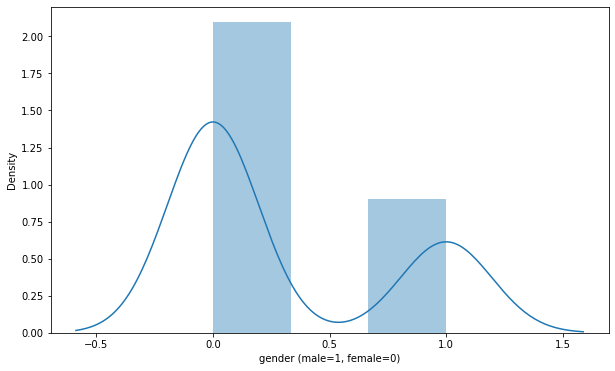

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


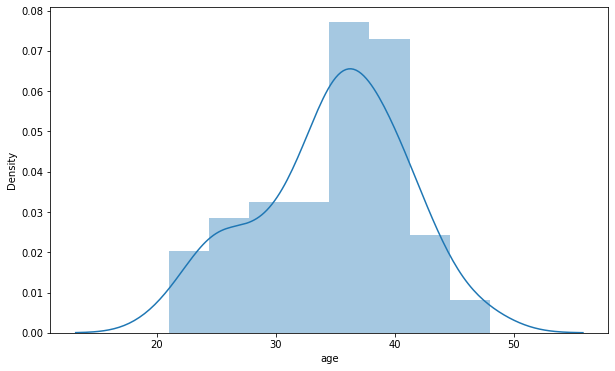

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


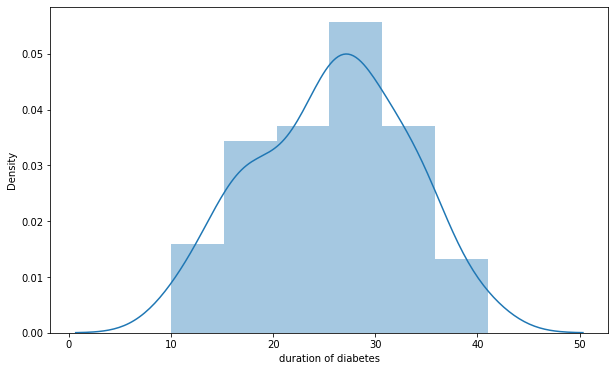

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


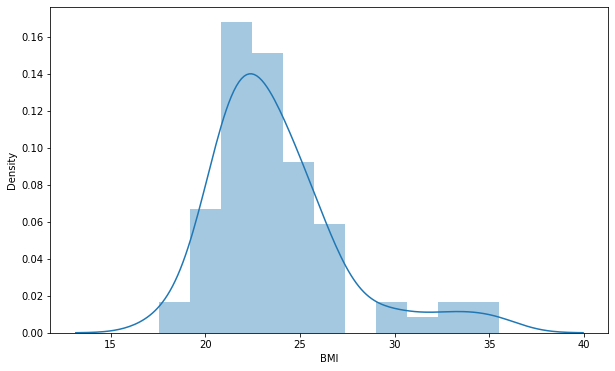

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


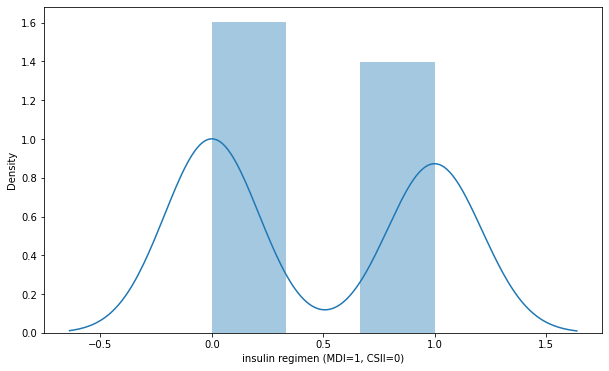

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


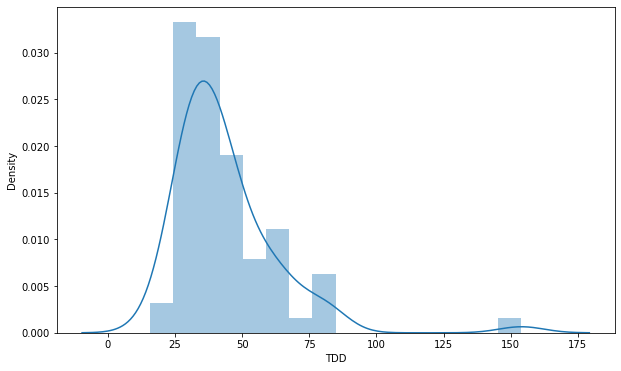

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


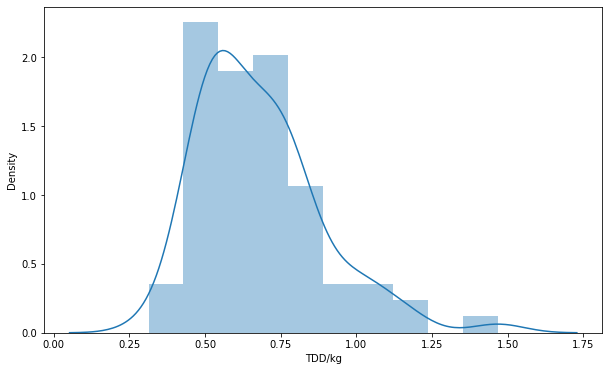

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


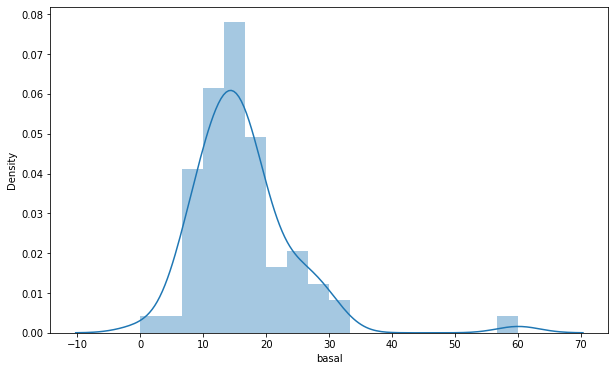

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


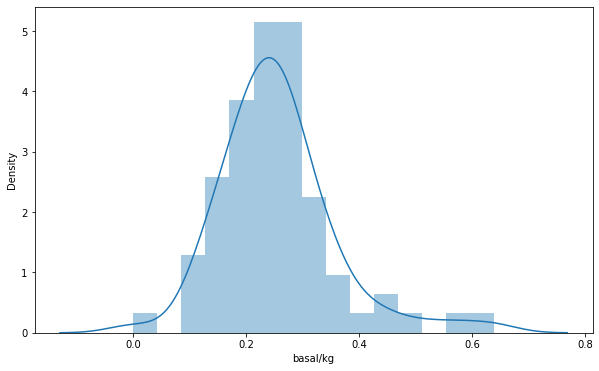

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


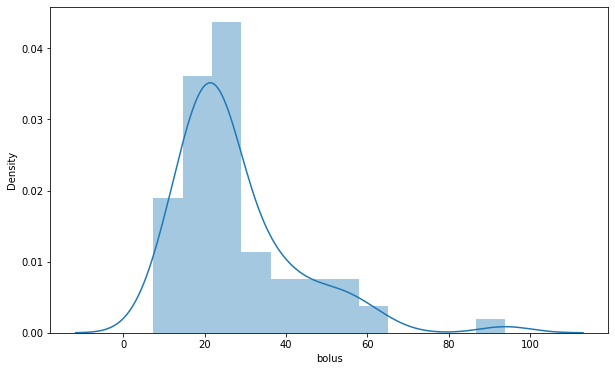

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


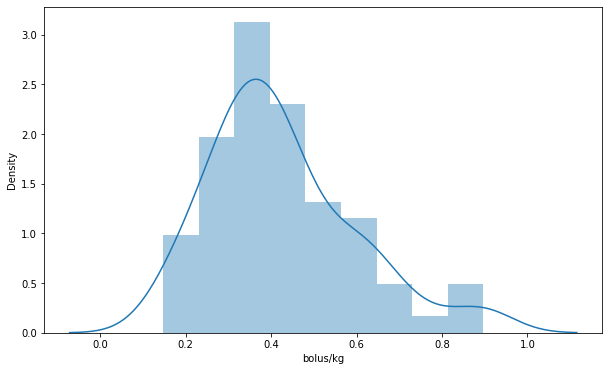

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


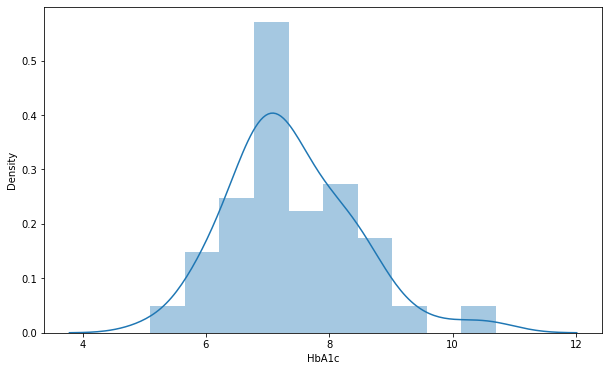

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


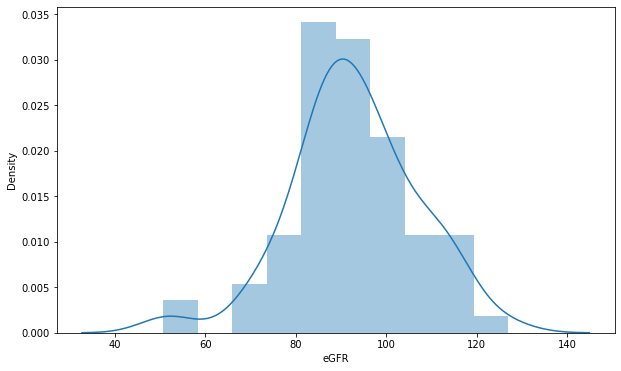

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


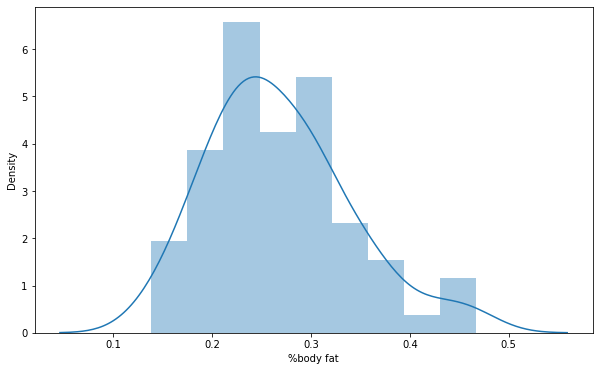

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


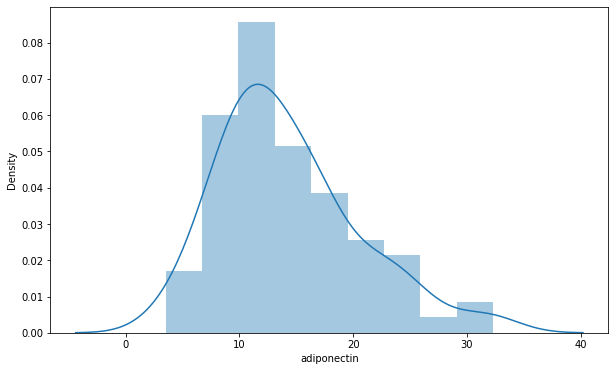

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


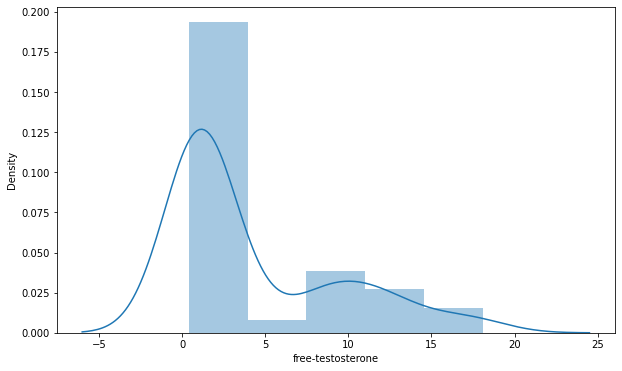

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


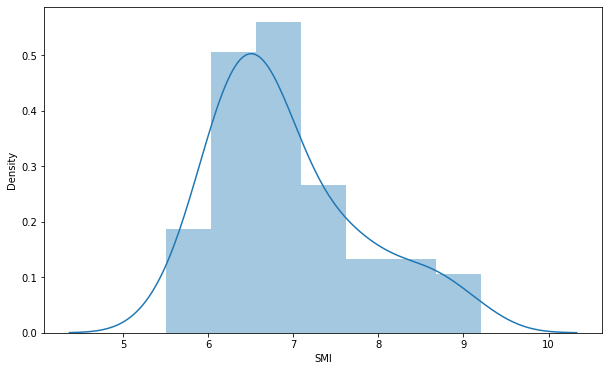

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


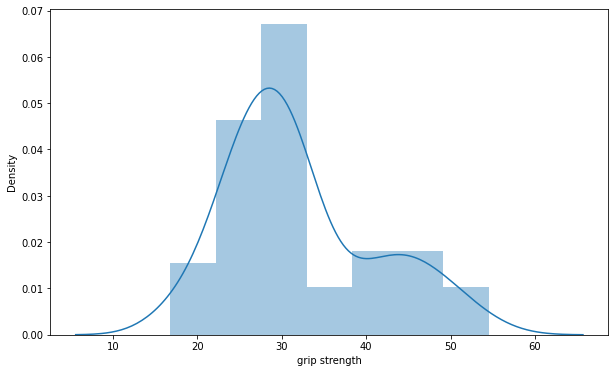

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


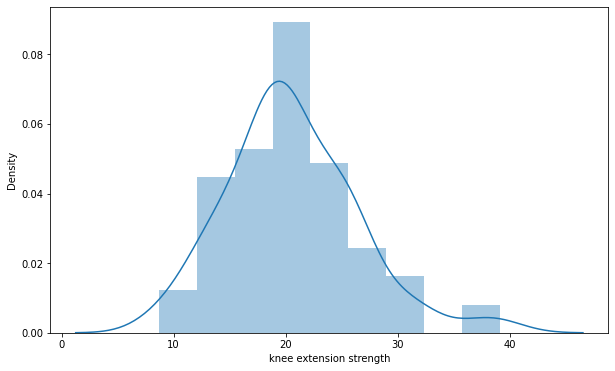

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


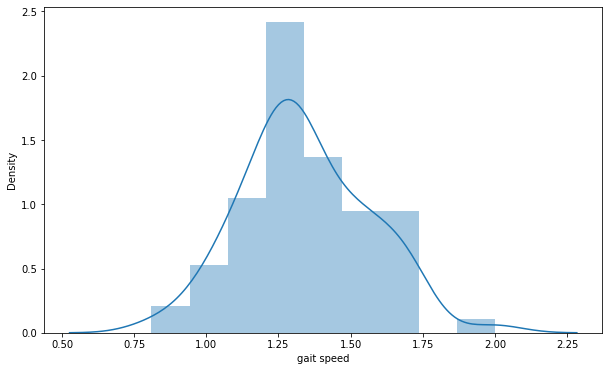

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


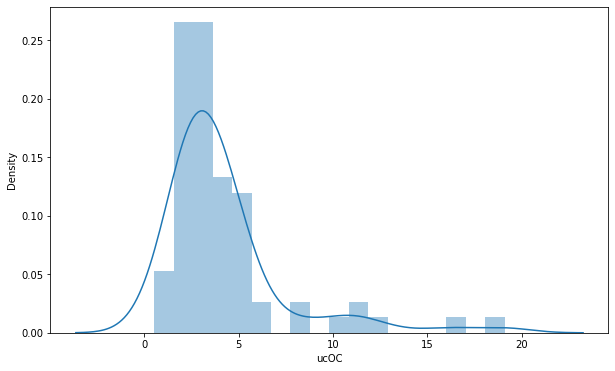

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


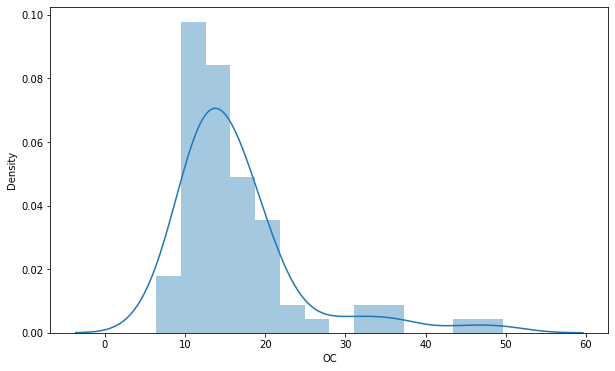

In [16]:
for i in data.columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(data[i])
    plt.show()
    plt.close()

# Taking out correlated variables

In [17]:
datacorr = data1.corr()
datacorr

,sex,age,duration_of_diabetes,BMI,insulin_regimen,TDD,TDD/kg,basal,basal/kg,bolus,bolus/kg,HbA1c,eGFR,bodyfat,adiponectin,free-test,SMI,grip_strength,knee_extension_strength,gait_speed,ucOC,OC
sex,1.000000,0.146414,0.159551,0.304298,0.583730,0.509342,0.304679,0.318679,0.071316,0.503594,0.320411,-0.078746,0.204144,-0.299212,-0.307769,0.926533,0.800401,0.820667,0.609209,0.154574,-0.007539,0.027756
age,0.146414,1.000000,0.757926,0.086471,0.109060,-0.179238,-0.266439,-0.160990,-0.192165,-0.150821,-0.203069,-0.090610,-0.346239,-0.024020,0.088059,0.074747,0.175600,0.208567,0.172928,0.154913,-0.157385,-0.178085
duration_of_diabetes,0.159551,0.757926,1.000000,0.033943,0.104471,-0.241591,-0.349605,-0.194435,-0.213305,-0.215480,-0.289535,-0.022348,-0.291965,-0.052776,0.142900,0.170512,0.118603,0.179254,0.264489,0.369306,-0.174341,-0.175561
BMI,0.304298,0.086471,0.033943,1.000000,-0.090492,0.539420,0.168045,0.465295,0.076337,0.464279,0.154735,0.278879,0.108933,0.697425,-0.278430,0.252305,0.636459,0.287712,0.178437,0.117796,-0.183652,-0.176257
insulin_regimen,0.583730,0.109060,0.104471,-0.090492,1.000000,0.322503,0.373121,0.215324,0.179020,0.311545,0.337908,0.014328,0.112080,-0.375733,-0.115888,0.544940,0.299652,0.444113,0.368044,0.110601,0.048951,0.047582
TDD,0.509342,-0.179238,-0.241591,0.539420,0.322503,1.000000,0.869584,0.733927,0.438998,0.930218,0.774577,0.157524,0.209718,0.159525,-0.386311,0.480159,0.617902,0.439986,0.333048,-0.057905,-0.032065,-0.030433
TDD/kg,0.304679,-0.266439,-0.349605,0.168045,0.373121,0.869584,1.000000,0.618316,0.544776,0.819652,0.867013,0.132187,0.150260,-0.047647,-0.307059,0.297352,0.302686,0.229387,0.184706,-0.155225,0.061174,0.056520
basal,0.318679,-0.160990,-0.194435,0.465295,0.215324,0.733927,0.618316,1.000000,0.865771,0.433429,0.221799,0.194862,0.051221,0.199213,-0.326235,0.275674,0.404733,0.274662,0.224254,0.083623,-0.039900,-0.029661
basal/kg,0.071316,-0.192165,-0.213305,0.076337,0.179020,0.438998,0.544776,0.865771,1.000000,0.114651,0.054474,0.166581,-0.070002,-0.007271,-0.189893,0.052416,0.050070,0.023136,0.090267,0.079196,0.039993,0.052709
bolus,0.503594,-0.150821,-0.215480,0.464279,0.311545,0.930218,0.819652,0.433429,0.114651,1.000000,0.907850,0.103709,0.250573,0.104014,-0.336274,0.488110,0.601131,0.435356,0.320710,-0.122011,-0.020984,-0.024352


In [18]:
datacorr1 = data1.corr(method='pearson').unstack().sort_values(ascending=False).drop_duplicates()


In [19]:
datacorr2 = pd.DataFrame(data=datacorr1)
datacorr2.loc[datacorr2[0] > 0.5]

,,0
OC,OC,1.000000
ucOC,OC,0.971038
TDD,bolus,0.930218
sex,free-test,0.926533
bolus/kg,bolus,0.907850
TDD,TDD/kg,0.869584
bolus/kg,TDD/kg,0.867013
basal/kg,basal,0.865771
grip_strength,sex,0.820667
bolus,TDD/kg,0.819652


uc - OC = Highly correlated, let's drop ucOC

-TDD: is highly corrrelationated with everyone except basal/kg. We can drop all of the dosages and leave TDD which is the most simple and can be answered in a single question ie: How many units of insulin a day do you take? Can we add a column tdd/kg?

-Free test is highly correlationated with sex. We can drop Free-testosterone as you would need endocrine labs. (Also is highly variable during the day)

-Sex is highly correlationated with all of measures of strength, and free muscle mass. We can drop that? 

-BMI is correlationated with bodyfat. We are going to drop bodyfat, as you often need either calipters or more specialized equipment to measure it.


In [20]:
datafinal = data1.drop(['ucOC', 'basal', 'bolus', 'basal/kg', 'bolus/kg', 'TDD/kg', 'bodyfat', 'grip_strength', 'free-test', 'SMI', 'knee_extension_strength'], axis = 1)

In [21]:
datafinal

,sex,age,duration_of_diabetes,BMI,insulin_regimen,TDD,HbA1c,eGFR,adiponectin,gait_speed,OC
0,0.0,31.0,17.0,22.437670,0.0,43.700001,6.300000,82.927682,14.3,0.81000,49.6
1,1.0,31.0,25.0,25.556936,1.0,64.000000,7.800000,92.427345,10.0,1.54000,17.4
2,0.0,32.0,26.0,20.976562,0.0,27.400000,5.800000,84.945605,16.1,1.20000,10.8
3,0.0,25.0,17.0,21.297760,1.0,60.000000,7.200000,92.742008,6.6,1.38000,14.5
4,1.0,39.0,35.0,32.608940,0.0,60.950001,7.600000,108.602288,13.8,1.28000,12.2
...,...,...,...,...,...,...,...,...,...,...,...
68,0.0,36.0,28.0,18.701096,1.0,47.000000,9.200000,50.706049,14.5,1.71000,44.4
69,1.0,47.0,34.0,25.460822,1.0,28.000000,6.900000,76.758299,11.8,1.52000,12.9
70,1.0,21.0,15.0,25.935053,1.0,72.000000,7.900000,114.248257,13.4,1.55000,27.1
71,1.0,36.0,29.0,24.483321,1.0,34.000000,7.344959,93.655404,10.8,1.71000,17.0


# Outliers


# Random Forest Regressor

In [22]:
datafinal.columns

Index(['sex', 'age', 'duration_of_diabetes', 'BMI', 'insulin_regimen', 'TDD',
       'HbA1c', 'eGFR', 'adiponectin', 'gait_speed', 'OC'],
      dtype='object')

In [23]:
X = datafinal.drop('duration_of_diabetes', axis = 1)

In [24]:
y = datafinal['duration_of_diabetes']

I will just set a n = 100 trees for the random forest

In [25]:
rf_diabetes2= RandomForestRegressor(n_estimators=100)

# Looping through 1000 random forests



In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [27]:
#Sklearn does't have any function for SMAPE, so I wrote a function in python
#The function has 100%/n. I replaced 100% with 1, to have values between 0 and 1 in form of percentages.
#A is the real, while F is predicted.
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f)))

In [28]:
r2mean = []
SMAPEm = []
MSEm = []
RMSEm = []
MAEm= []

In [29]:
for x in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
  rf_diabetes2.fit(X_train, y_train)
  r2 = rf_diabetes2.score(X_test, y_test)
  y_pred = rf_diabetes2.predict(X_test)
  r2mean.append(r2)
  MAE = mean_absolute_error(y_test, y_pred)
  MAEm.append(MAE)
  MSE = mean_squared_error(y_test, y_pred)
  MSEm.append(MSE)
  RMSE = sqrt(mean_squared_error(y_test, y_pred))
  RMSEm.append(RMSE)
  SMAPE = smape(y_test, y_pred)
  SMAPEm.append(SMAPE)

The score of the random forest regressor is by default the r*2. I appended the r2 from each randomforest I looped through, to the list r2mean.

In [30]:
R2mean=np.mean(r2mean)
MSEmean=np.mean(MSEm)
RMSEmean=np.mean(RMSEm)
SMAPEmean= np.mean(SMAPEm)
MAEmean= np.mean(MAE)

In [31]:
Metrics = {'Metrics Means': ['R2', 'MSE', 'RMSE', 'SMAPE', 'MAE'],
           'Values': [np.mean(r2mean), np.mean(MSEm), np.mean(RMSEm), np.mean(SMAPEm), np.mean(MAE)]
           }

In [32]:
MetricsDF = pd.DataFrame.from_dict(Metrics)

In [33]:
MetricsDF

,Metrics Means,Values
0,R2,0.458193
1,MSE,27.183846
2,RMSE,5.163263
3,SMAPE,0.171443
4,MAE,3.394545


# Feature Importance and Prediction visualization

In [34]:
pred = rf_diabetes2.predict(X_test)

In [35]:
predictions = zip(pred, y_test)


In [36]:
predictions = pd.DataFrame(predictions)
predictions.columns = ['predicted', 'actual']
predictions

,predicted,actual
0,35.42,33.0
1,29.36,35.0
2,28.25,22.0
3,27.88,30.0
4,25.45,18.0
5,20.06,14.0
6,31.38,31.0
7,33.54,39.0
8,25.66,29.0
9,16.50,16.0


# Feature Selection


In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=1) 
rfe.fit(X_train, y_train)
rf_df = pd.DataFrame(rfe.ranking_, index=X_test.columns, columns=['Rank-Randomforest']).sort_values(by='Rank-Randomforest',ascending=True)


In [39]:
rfe2 = RFE(estimator=LinearRegression(), n_features_to_select=1) 
rfe2.fit(X_train, y_train)
rf_df2 = pd.DataFrame(rfe2.ranking_, index=X_test.columns, columns=['Rank-LinearReg']).sort_values(by='Rank-LinearReg',ascending=True)

In [40]:
from sklearn.svm import SVR

In [41]:
rfe3 = RFE(estimator=SVR(kernel="linear"), n_features_to_select=1) 
rfe3.fit(X_train, y_train)
rf_df3 = pd.DataFrame(rfe3.ranking_, index=X_test.columns, columns=['Rank-SVR']).sort_values(by='Rank-SVR',ascending=True)

In [42]:
rankingdf = pd.concat([rf_df, rf_df2, rf_df3], axis=1)
rankingdf 

,Rank-Randomforest,Rank-LinearReg,Rank-SVR
age,1,4,3
HbA1c,2,5,5
gait_speed,3,1,1
adiponectin,4,8,6
eGFR,5,9,9
TDD,6,7,10
OC,7,10,8
BMI,8,6,7
insulin_regimen,9,3,4
sex,10,2,2


# Random Forest with 4 features that could be easily taken in the first consult - Based on Random forest Feature ranking


In [43]:
FeaturesSelected = datafinal[['age', 'TDD', 'gait_speed', 'BMI', 'duration_of_diabetes']]

In [44]:
Xfs = FeaturesSelected.drop('duration_of_diabetes', axis = 1)
yfs = FeaturesSelected['duration_of_diabetes']

In [45]:
fr2mean = []
fSMAPEm = []
fMSEm = []
fRMSEm = []
fMAEm= []

In [46]:
for x in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(Xfs, yfs, test_size=0.30)
  rf_diabetes2.fit(X_train, y_train)
  fr2 = rf_diabetes2.score(X_test, y_test)
  y_pred = rf_diabetes2.predict(X_test)
  fr2mean.append(fr2)
  fMAE = mean_absolute_error(y_test, y_pred)
  fMAEm.append(fMAE)
  fMSE = mean_squared_error(y_test, y_pred)
  fMSEm.append(fMSE)
  fRMSE = sqrt(mean_squared_error(y_test, y_pred))
  fRMSEm.append(fRMSE)
  fSMAPE = smape(y_test, y_pred)
  fSMAPEm.append(fSMAPE)

In [47]:
fMetrics = {'Metrics Means': ['R2', 'MSE', 'RMSE', 'SMAPE', 'MAE'],
           'Values': [np.mean(fr2mean), np.mean(fMSEm), np.mean(fRMSEm), np.mean(fSMAPEm), np.mean(fMAE)]
           }

In [48]:
fMetricsDF = pd.DataFrame.from_dict(fMetrics)
fMetricsDF

,Metrics Means,Values
0,R2,0.477784
1,MSE,26.138621
2,RMSE,5.069888
3,SMAPE,0.171057
4,MAE,2.995000
